In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
# assign dataset names
list_of_names = ['01.geo','02.customers','03.sellers','04.order_status','05.order_items',
                '06.order_payments','07.product_reviews','08.products']

# create empty list
df = []
  
# append datasets into the list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv (list_of_names [i] + ".csv", encoding="ISO-8859-1",delimiter = ";")
    df.append(temp_df)

In [3]:
geo =df[0] #geo
customers =df[1] #customers
sellers =df[2]  #sellers
order_status =df[3]  #order status
order_items =df[4]  #order items
order_payments =df[5]  #order payments
order_reviews =df[6]   #product reviews
products =df[7]   #products

In [4]:
#### Now, we start to merge the datasets

df = pd.merge(order_status,customers,on='customer_id')
df = df.merge(order_items, on='order_id')
df = df.merge(order_payments, on='order_id')
df = df.merge(products, on='product_id')
df = df.merge(sellers, on='seller_id')
df_final = df.merge(order_reviews, on='order_id' )
df_final.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status ts_order_purchase ts_order_approved ts_order_delivered_carrier  \
0    delivered  02/10/2018 10:56  02/10/2018 11:07           04/10/2018 19:55   
1    delivered  02/10/2018 10:56  02/10/2018 11:07           04/10/2018 19:55   
2    delivered  02/10/2018 10:56  02/10/2018 11:07           04/10/2018 19:55   
3    delivered  15/08/2018 18:29  15/08/2018 20:05           17/08/2018 15:28   
4    delivered  02/08/2018 18:24  02/08/2018 18:43           04/08/2018 17:35   

  ts_order_delivered_customer ts_order_estimated_delivery  \
0            10/10/2018 21:25            18/10/2018 00:00   
1            10/10/2018 21:25            18/10/2018 00:00   
2            10/10/2018 21:25            18/10/2018 00:00   
3            18/08/2018 14:44            28/08/2018 00:00   
4            07/08/2018 18:30            15/08/2018 00:00   

                 customer_unique_id customer_autonomous_community  ...  \
0  7c396fd4830fd04220f754e42b4e5bff           Comunidad de Madrid  ...   
1  7c396fd4830fd04220f754e42b4e5bff           Comunidad de Madrid  ...   
2  7c396fd4830fd04220f754e42b4e5bff           Comunidad de Madrid  ...   
3  3a51803cc0d012c3b5dc8b7528cb05f7           Comunidad de Madrid  ...   
4  ef0996a1a279c26e7ecbd737be23d235           Comunidad de Madrid  ...   

  product_weight_gr  product_length_cm product_height_cm product_width_cm  \
0             500.0               19.0               8.0             13.0   
1             500.0               19.0               8.0             13.0   
2             500.0               19.0               8.0             13.0   
3             500.0               19.0               8.0             13.0   
4             500.0               19.0               8.0             13.0   

  product_photo_quantity seller_autonomous_community seller_city  \
0                    4.0                   Andalucía      Málaga   
1                    4.0                   Andalucía      Málaga   
2                    4.0                   Andalucía      Málaga   
3                    4.0                   Andalucía      Málaga   
4                    4.0                   Andalucía      Málaga   

                       product_id_y  review_score       review_date  
0  87285b34884572647811a353c7ac498a             5  12/10/2018 03:43  
1  87285b34884572647811a353c7ac498a             5  12/10/2018 03:43  
2  87285b34884572647811a353c7ac498a             5  12/10/2018 03:43  
3  87285b34884572647811a353c7ac498a             5  20/08/2018 15:16  
4  87285b34884572647811a353c7ac498a             1  08/08/2018 23:26  

[5 rows x 32 columns]

In [6]:
df_final = pd.read_csv('df.csv', index_col=[0])

In [ ]:
#df_final

## I create a function that takes as input a comunity and result in a 3D graph according for the three variables: 'product_category_name', 'review_score','price'.

In [7]:
def Graph3D(Comunity):
    df = df_final[df_final['customer_autonomous_community']==Comunity]
    df.reset_index(inplace=True,drop=True)
    df = df[['customer_id','product_category_name', 'review_score','price']]
    df = df.set_index('customer_id')
    
    labelencoder_X_1 = LabelEncoder()
    df['product_category_name'] = labelencoder_X_1.fit_transform(df['product_category_name'])
    
    X3 = df[['product_category_name','price','review_score']]
    
    x = X3.iloc[:,0]
    y = X3.iloc[:,1]
    z = X3.iloc[:,2]

    fig = plt.figure(figsize=(5,5))
    ax = Axes3D(fig)

    ax.scatter(x,y,z,s=40,marker='o',alpha=1)

    ax.set_xlabel('product_category_name')
    ax.set_ylabel('price')
    ax.set_zlabel('review_score')

## Another function that split the comunity into a number of clusters 

In [8]:
def cluster3D(Comunity, number_of_cluster):
    df = df_final[df_final['customer_autonomous_community']==Comunity]
    df.reset_index(inplace=True,drop=True)
    df = df[['customer_id','product_category_name', 'review_score','price']]
    df = df.set_index('customer_id')
    
    labelencoder_X_1 = LabelEncoder()
    df['product_category_name'] = labelencoder_X_1.fit_transform(df['product_category_name'])
    
    X3 = df[['product_category_name','price','review_score']]
    
    x = X3.iloc[:,0]
    y = X3.iloc[:,1]
    z = X3.iloc[:,2]

    hc3 = AgglomerativeClustering(n_clusters = number_of_cluster, affinity = 'euclidean', linkage = 'ward')
    y_hc3 = hc3.fit_predict(X3)
    
    fig = plt.figure(figsize=(5,5))
    ax = Axes3D(fig)

    ax.scatter(x,y,z,s=40,c = y_hc3,marker='o',alpha=1)

    ax.set_xlabel('product_category_name')
    ax.set_ylabel('price')
    ax.set_zlabel('review_score')

## I just remember what are the comunities in the dataset

In [9]:
df_final['customer_autonomous_community'].unique()

array(['Andalucía', 'Comunidad de Madrid', 'Castilla-La Mancha',
       'Cataluña', 'Comunidad Valenciana', 'País Vasco', 'Baleares',
       'Galicia', 'Cantabria', 'La Rioja', 'Castilla y León',
       'Principado de Asturias', 'Extremadura', 'Región de Murcia',
       'Aragón', 'Islas Canarias', 'Comunidad Foral de Navarra'],
      dtype=object)

## Input the comunity for which you want to compute the cluster

In [10]:
Communità = input()

Comunidad Foral de Navarra


## I make the graph

/var/folders/08/vt8t6b9n3cv6yf__l3l67z300000gn/T/ipykernel_9275/266966482.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


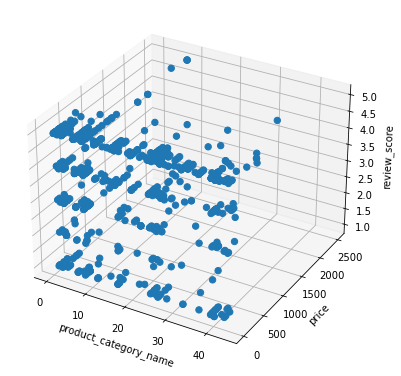

In [11]:
Graph3D(Communità)

## I make the division in a number of clusters

/var/folders/08/vt8t6b9n3cv6yf__l3l67z300000gn/T/ipykernel_9275/23160412.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


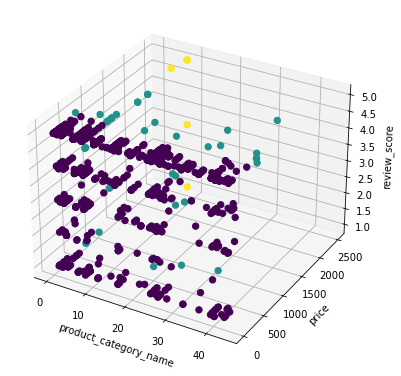

In [13]:
cluster3D(Communità,3)

## I filter my dataset for the customers that have already made more than 2 orders 

In [14]:
df_final = pd.read_csv('df.csv', index_col=[0])
df_atleast = df_final.loc[df_final.groupby('customer_id')['customer_id'].transform('size') >= 3] ## VOGLIO SOLAMENTE I CUSTOMERS CHE HANNO FATTO ALMENO TRE ORDINI
df_atleast.reset_index(drop=True,inplace=True)

In [16]:
df_atleast.columns

Index(['order_id', 'customer_id', 'order_status', 'ts_order_purchase',
       'ts_order_approved', 'ts_order_delivered_carrier',
       'ts_order_delivered_customer', 'ts_order_estimated_delivery',
       'customer_unique_id', 'customer_autonomous_community', 'customer_city',
       'order_item_sequence_id', 'product_id_x', 'price', 'shipping_cost',
       'seller_id', 'max_shipping_seller_date', 'payment_method',
       'payment_method_sequence_id', 'payment_installments_quantity',
       'transaction_value', 'product_category_name', 'product_weight_gr',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_photo_quantity', 'seller_autonomous_community', 'seller_city',
       'product_id_y', 'review_score', 'review_date'],
      dtype='object')

## I select the features that allow me to compute the clusters 

In [17]:
df = df_atleast[['customer_id','product_category_name','price', 'review_score','customer_city']]
df = df.set_index('customer_id')

In [18]:
df

product_category_name  price  review_score  \
customer_id                                                                   
00066ccbe787a588c52bd5ff404590e3           lawn garden  49.90             5   
00066ccbe787a588c52bd5ff404590e3           lawn garden  49.90             5   
00066ccbe787a588c52bd5ff404590e3           lawn garden  49.90             5   
00066ccbe787a588c52bd5ff404590e3           lawn garden  49.90             5   
000e943451fc2788ca6ac98a682f2f49      kitchen & dining  89.90             5   
...                                                ...    ...           ...   
fff93c1da78dafaaa304ff032abc6205                  book  69.45             4   
fff93c1da78dafaaa304ff032abc6205                  book  59.99             3   
fffecc9f79fd8c764f843e9951b11341      kitchen & dining  54.90             1   
fffecc9f79fd8c764f843e9951b11341      kitchen & dining  54.90             1   
fffecc9f79fd8c764f843e9951b11341      kitchen & dining  54.90             1   

                                 customer_city  
customer_id                                     
00066ccbe787a588c52bd5ff404590e3      Valencia  
00066ccbe787a588c52bd5ff404590e3      Valencia  
00066ccbe787a588c52bd5ff404590e3      Valencia  
00066ccbe787a588c52bd5ff404590e3      Valencia  
000e943451fc2788ca6ac98a682f2f49     Castellón  
...                                        ...  
fff93c1da78dafaaa304ff032abc6205       Granada  
fff93c1da78dafaaa304ff032abc6205       Granada  
fffecc9f79fd8c764f843e9951b11341      Alicante  
fffecc9f79fd8c764f843e9951b11341      Alicante  
fffecc9f79fd8c764f843e9951b11341      Alicante  

[26405 rows x 4 columns]

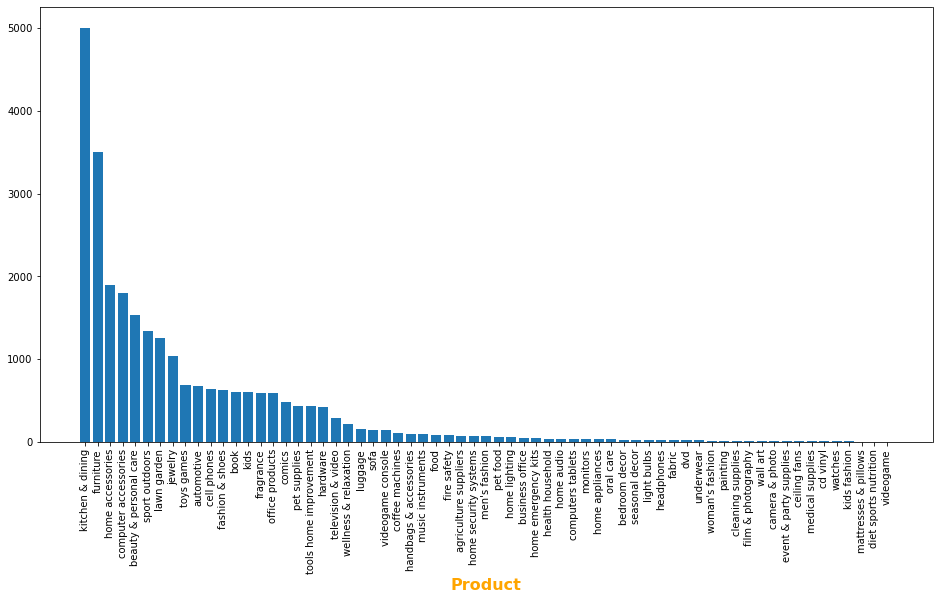

In [19]:
df_bar_product = df_atleast['product_category_name'].value_counts().sort_index()
df_bar_product = df_bar_product.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(df_bar_product.index, df_bar_product.values)
plt.xlabel('Product', fontweight='bold', color = 'orange', fontsize='16')
plt.xticks(rotation=90)
plt.show()

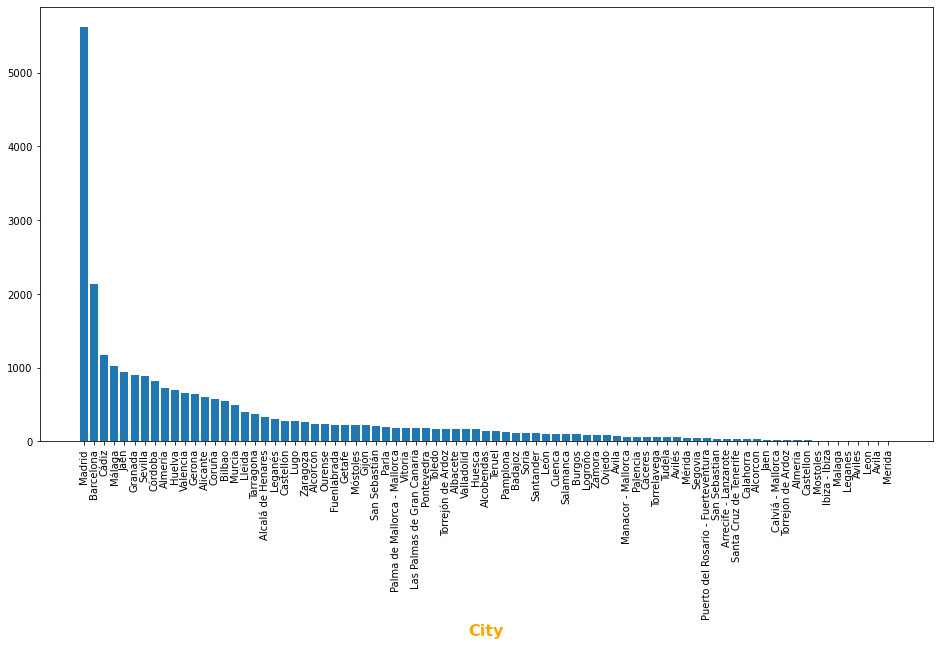

In [20]:
df_bar_city = df_atleast['customer_city'].value_counts().sort_index()
df_bar_city = df_bar_city.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(df_bar_city.index, df_bar_city.values)
plt.xlabel('City', fontweight='bold', color = 'orange', fontsize='16')
plt.xticks(rotation=90)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
df['product_category_name'] = labelencoder_X_1.fit_transform(df['product_category_name'])
labelencoder_X_2 = LabelEncoder()
df['customer_city'] = labelencoder_X_2.fit_transform(df['customer_city'])

In [22]:
df['product_category_name'].head(30)  ## just for checking

customer_id
00066ccbe787a588c52bd5ff404590e3    39
00066ccbe787a588c52bd5ff404590e3    39
00066ccbe787a588c52bd5ff404590e3    39
00066ccbe787a588c52bd5ff404590e3    39
000e943451fc2788ca6ac98a682f2f49    38
000e943451fc2788ca6ac98a682f2f49    38
000e943451fc2788ca6ac98a682f2f49    38
000e943451fc2788ca6ac98a682f2f49    38
001051abfcfdbed9f87b4266213a5df1    29
001051abfcfdbed9f87b4266213a5df1    29
001051abfcfdbed9f87b4266213a5df1    29
001450ebb4a77efb3d68be5f7887cb1e     9
001450ebb4a77efb3d68be5f7887cb1e     9
001450ebb4a77efb3d68be5f7887cb1e     9
001450ebb4a77efb3d68be5f7887cb1e     9
002f90a6eb386bc43bc9ba200db31a89    60
002f90a6eb386bc43bc9ba200db31a89    60
002f90a6eb386bc43bc9ba200db31a89    60
002f90a6eb386bc43bc9ba200db31a89    60
0031abfb953b66e998f67b09e7b11375    35
0031abfb953b66e998f67b09e7b11375    35
0031abfb953b66e998f67b09e7b11375    35
0031abfb953b66e998f67b09e7b11375    35
00331de1659c7f4fb660c8810e6de3f5    29
00331de1659c7f4fb660c8810e6de3f5    29
00331de1659c7

In [23]:
df_atleast['product_category_name'].head(30)  ##just for checking

0           lawn garden
1           lawn garden
2           lawn garden
3           lawn garden
4      kitchen & dining
5      kitchen & dining
6      kitchen & dining
7      kitchen & dining
8      home accessories
9      home accessories
10     home accessories
11          cell phones
12          cell phones
13          cell phones
14          cell phones
15    videogame console
16    videogame console
17    videogame console
18    videogame console
19              jewelry
20              jewelry
21              jewelry
22              jewelry
23     home accessories
24     home accessories
25     home accessories
26       sport outdoors
27       sport outdoors
28       sport outdoors
29       sport outdoors
Name: product_category_name, dtype: object

Text(0.5, 0, 'Review Score')

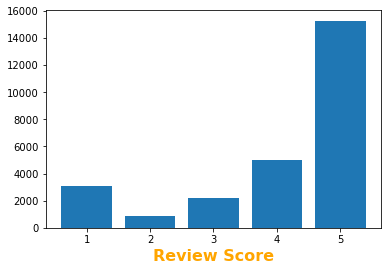

In [24]:
df_bar_score = df['review_score'].value_counts().sort_index()

plt.bar(df_bar_score.index, df_bar_score.values)
plt.xlabel('Review Score', fontweight='bold', color = 'orange', fontsize='16')

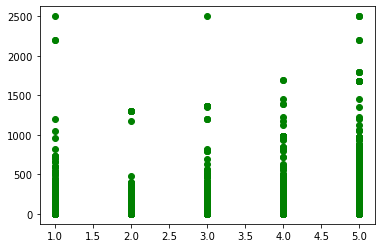

In [25]:
plt.scatter(df['review_score'],df['price'],color='green')

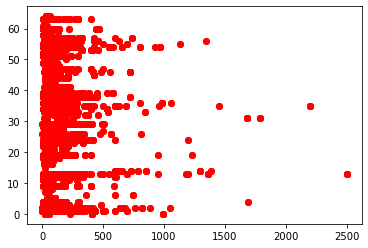

In [26]:
plt.scatter(df['price'],df['product_category_name'],color='r')

In [27]:
df

product_category_name  price  review_score  \
customer_id                                                                    
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5   
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5   
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5   
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5   
000e943451fc2788ca6ac98a682f2f49                     38  89.90             5   
...                                                 ...    ...           ...   
fff93c1da78dafaaa304ff032abc6205                      4  69.45             4   
fff93c1da78dafaaa304ff032abc6205                      4  59.99             3   
fffecc9f79fd8c764f843e9951b11341                     38  54.90             1   
fffecc9f79fd8c764f843e9951b11341                     38  54.90             1   
fffecc9f79fd8c764f843e9951b11341                     38  54.90             1   

                                  customer_city  
customer_id                                      
00066ccbe787a588c52bd5ff404590e3             75  
00066ccbe787a588c52bd5ff404590e3             75  
00066ccbe787a588c52bd5ff404590e3             75  
00066ccbe787a588c52bd5ff404590e3             75  
000e943451fc2788ca6ac98a682f2f49             19  
...                                         ...  
fff93c1da78dafaaa304ff032abc6205             29  
fff93c1da78dafaaa304ff032abc6205             29  
fffecc9f79fd8c764f843e9951b11341              5  
fffecc9f79fd8c764f843e9951b11341              5  
fffecc9f79fd8c764f843e9951b11341              5  

[26405 rows x 4 columns]

## I compute the clusters for customers with the features: category product and price

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

X = df.iloc[:, [0, 1]].values #category vs price

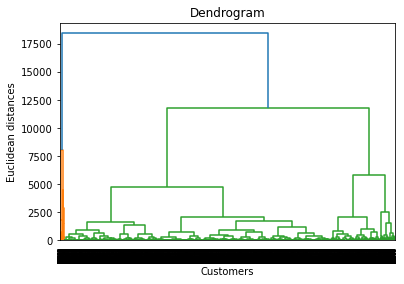

In [29]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
plt.xticks([])

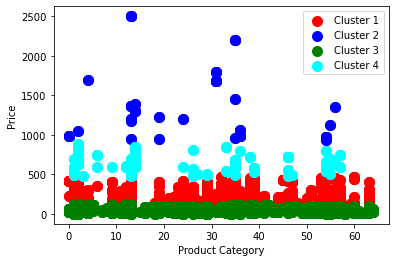

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.legend()

## I compute the clusters for customers with the features: category price and review

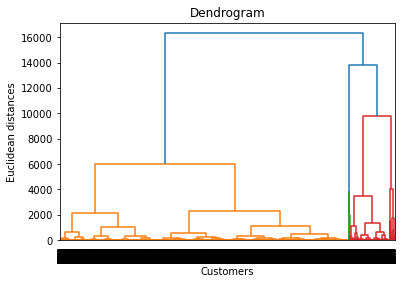

([], [])

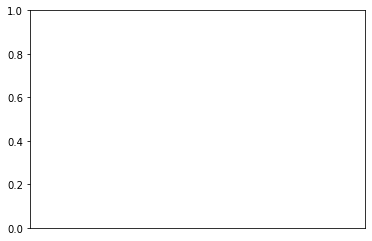

In [34]:
X2 = df.iloc[:, [1, 2]].values #price review

dendrogram1 = sch.dendrogram(sch.linkage(X2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
plt.xticks([])

In [30]:
hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(X2)

NameError: name 'X2' is not defined

In [ ]:
plt.scatter(X2[y_hc2 == 0, 1], X2[y_hc2 == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_hc2 == 1, 1], X2[y_hc2 == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_hc2 == 2, 1], X2[y_hc2 == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_hc2 == 3, 1], X2[y_hc2 == 3, 0], s = 100, c = 'cyan', label = 'Cluster 4')
plt.xlabel('Review')
plt.ylabel('Price')

## Now I will use all the 3 variables and plot the resuts in a 3D graph

In [43]:
X3 = df[['product_category_name','price','review_score']]
X3.shape

(26405, 3)

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

x = X3.iloc[:,0]
y = X3.iloc[:,1]
z = X3.iloc[:,2]

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x,y,z,s=40,marker='o',alpha=1)

ax.set_xlabel('product_category_name')
ax.set_ylabel('price')
ax.set_zlabel('review_score')

In [ ]:
hc3 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X3)

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(x,y,z,s=40,c = y_hc3,marker='o',alpha=1)

ax.set_xlabel('product_category_name')
ax.set_ylabel('product_photo_quantity')
ax.set_zlabel('review_score')

In [35]:
df = df[['product_category_name','price','review_score']]
df

product_category_name  price  review_score
customer_id                                                                 
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5
00066ccbe787a588c52bd5ff404590e3                     39  49.90             5
000e943451fc2788ca6ac98a682f2f49                     38  89.90             5
...                                                 ...    ...           ...
fff93c1da78dafaaa304ff032abc6205                      4  69.45             4
fff93c1da78dafaaa304ff032abc6205                      4  59.99             3
fffecc9f79fd8c764f843e9951b11341                     38  54.90             1
fffecc9f79fd8c764f843e9951b11341                     38  54.90             1
fffecc9f79fd8c764f843e9951b11341                     38  54.90             1

[26405 rows x 3 columns]

## I repeat the analysis standardizing the features

In [36]:
scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)
data_scaled = pd.DataFrame(data=data_scaled,index=df.index,columns=df.columns)

In [37]:
data_scaled.describe().round(2)

product_category_name     price  review_score
count               26405.00  26405.00      26405.00
mean                   -0.00      0.00         -0.00
std                     1.00      1.00          1.00
min                    -1.87     -0.75         -2.27
25%                    -0.68     -0.47         -0.06
50%                    -0.05     -0.23          0.68
75%                     0.51      0.13          0.68
max                     2.14     21.54          0.68

In [45]:
x = data_scaled.iloc[:,0]
y = data_scaled.iloc[:,1]
z = data_scaled.iloc[:,2]

## For the cluster analysis I have used three variables: product_category_name, price,	review_score. 
### I plot the dendrogram and visualize how many cluster I will need

([], [])

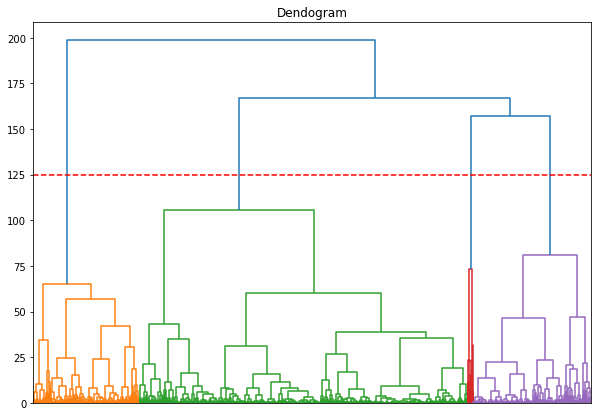

In [38]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend3 = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=125, color='r', linestyle='--')
plt.xticks([])

In [39]:
cluster3 = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'ward',distance_threshold=125)
ward_cluster = cluster3.fit_predict(data_scaled)

In [40]:
for i in ward_cluster:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
0
3
0
3
3
2
2
2
0
0
0
3
3
3
3
3
3
0
0
0
0
2
2
3
3
2
2
2
2
2
3
2
3
3
0
3
3
3
0
3
3
0
0
3
0
3
3
3
3
3
3
3
3
0
0
0
0
0
0
0
0
0
3
3
3
3
0
3
0
3
0
0
0
0
3
2
2
2
2
3
2
3
2
0
0
0
3
0
0
0
0
3
0
0
0
2
2
2
2
2
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
0
0
0
0
0
0
0
3
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
2
2
2
0
2
0
2
3
3
3
3
3
3
2
2
2
2
0
0
0
0
0
2
2
2
2
3
2
3
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
3
3
0
0
2
3
3
2
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
3
0
0
3
3
0
0
3
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
0
2
3
3
2
2
3
2
3
2
2
0
0
2
2
2
2
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
2
2
2
2
0
0
0
0
0
3
0
3
0
0
0
0
0
2
2
0
0
0
0
0
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
3
2
2
3
2
3
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
0
0
3
3
0
0
0
0
0
0
0
0
0
2
2
2
3
3
3
3
3
3
0
3
0
3
0
0
0
0
3
3
2
2
3
2
3
2
3
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
2
2


## I visualize the clusters 

/var/folders/08/vt8t6b9n3cv6yf__l3l67z300000gn/T/ipykernel_9275/249259287.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'review_score')

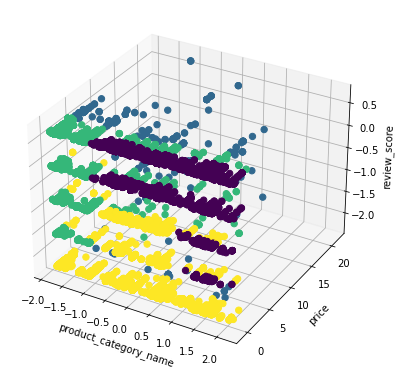

In [46]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x,y,z,s=40,c = ward_cluster,marker='o',alpha=1)

ax.set_xlabel('product_category_name')
ax.set_ylabel('price')
ax.set_zlabel('review_score')


In [48]:
cluster_data = pd.DataFrame(data=ward_cluster, columns=['Cluster'])
cluster_data

Cluster
0            0
1            0
2            0
3            0
4            0
...        ...
26400        2
26401        2
26402        3
26403        3
26404        3

[26405 rows x 1 columns]

In [49]:
cluster_data.max()

Cluster    3
dtype: int64

## I decide to give more weight in the cluster analysis to the price and less to the product category and review score

In [51]:
data_weighted = data_scaled
data_weighted

product_category_name     price  \
customer_id                                                         
00066ccbe787a588c52bd5ff404590e3               0.572894 -0.313224   
00066ccbe787a588c52bd5ff404590e3               0.572894 -0.313224   
00066ccbe787a588c52bd5ff404590e3               0.572894 -0.313224   
00066ccbe787a588c52bd5ff404590e3               0.572894 -0.313224   
000e943451fc2788ca6ac98a682f2f49               0.510324  0.043597   
...                                                 ...       ...   
fff93c1da78dafaaa304ff032abc6205              -1.617080 -0.138827   
fff93c1da78dafaaa304ff032abc6205              -1.617080 -0.223216   
fffecc9f79fd8c764f843e9951b11341               0.510324 -0.268621   
fffecc9f79fd8c764f843e9951b11341               0.510324 -0.268621   
fffecc9f79fd8c764f843e9951b11341               0.510324 -0.268621   

                                  review_score  
customer_id                                     
00066ccbe787a588c52bd5ff404590e3      0.679580  
00066ccbe787a588c52bd5ff404590e3      0.679580  
00066ccbe787a588c52bd5ff404590e3      0.679580  
00066ccbe787a588c52bd5ff404590e3      0.679580  
000e943451fc2788ca6ac98a682f2f49      0.679580  
...                                        ...  
fff93c1da78dafaaa304ff032abc6205     -0.057595  
fff93c1da78dafaaa304ff032abc6205     -0.794770  
fffecc9f79fd8c764f843e9951b11341     -2.269119  
fffecc9f79fd8c764f843e9951b11341     -2.269119  
fffecc9f79fd8c764f843e9951b11341     -2.269119  

[26405 rows x 3 columns]

In [52]:
data_weighted['product_category_name'] = data_weighted['product_category_name']*20
data_weighted['price'] = data_weighted['price']*60
data_weighted['review_score'] = data_weighted['review_score']*20

In [53]:
x = data_weighted.iloc[:,0]
y = data_weighted.iloc[:,1]
z = data_weighted.iloc[:,2]

## Re-plot the dendrogram to find the number of cluster 

([], [])

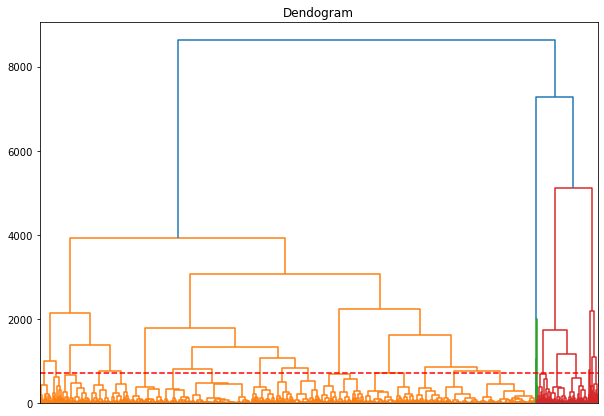

In [54]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend3 = sch.dendrogram(sch.linkage(data_weighted, method='ward'))
plt.axhline(y=6000, color='r', linestyle='--')
plt.xticks([])

In [56]:
cluster4 = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'ward',distance_threshold=6000)
ward_cluster2 = cluster4.fit_predict(data_weighted)
ward_cluster2

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
cluster_data2 = pd.DataFrame(data=ward_cluster2, columns=['Cluster_weighted'])
cluster_data2

Cluster_weighted
0                     1
1                     1
2                     1
3                     1
4                     1
...                 ...
26400                 1
26401                 1
26402                 1
26403                 1
26404                 1

[26405 rows x 1 columns]

## Plot the clusters

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x,y,z,s=40,c = ward_cluster2,marker='o',alpha=1)

ax.set_xlabel('product_category_name')
ax.set_ylabel('price')
ax.set_zlabel('review_score')

In [59]:
df.reset_index(drop=True,inplace=True)
df

product_category_name  price  review_score
0                         39  49.90             5
1                         39  49.90             5
2                         39  49.90             5
3                         39  49.90             5
4                         38  89.90             5
...                      ...    ...           ...
26400                      4  69.45             4
26401                      4  59.99             3
26402                     38  54.90             1
26403                     38  54.90             1
26404                     38  54.90             1

[26405 rows x 3 columns]

## I want to highlight the differences between the weighted and unweighted dataset

In [60]:
df_with_cluster = pd.concat([df,cluster_data,cluster_data2],axis=1)
df_with_cluster

product_category_name  price  review_score  Cluster  Cluster_weighted
0                         39  49.90             5        0                 1
1                         39  49.90             5        0                 1
2                         39  49.90             5        0                 1
3                         39  49.90             5        0                 1
4                         38  89.90             5        0                 1
...                      ...    ...           ...      ...               ...
26400                      4  69.45             4        2                 1
26401                      4  59.99             3        2                 1
26402                     38  54.90             1        3                 1
26403                     38  54.90             1        3                 1
26404                     38  54.90             1        3                 1

[26405 rows x 5 columns]

In [61]:
group1 = df_with_cluster.groupby('Cluster')['price'].mean()
group1

Cluster
0     68.218227
1    871.769213
2    100.193423
3     78.185272
Name: price, dtype: float64

In [62]:
group1.std()

395.01107314889384

In [63]:
group2 = df_with_cluster.groupby('Cluster_weighted')['price'].mean()
group2

Cluster_weighted
0     258.930862
1      60.334337
2    1566.723455
Name: price, dtype: float64

In [64]:
group2.std()

818.4304303294172

In [65]:
group1.describe()

count      4.000000
mean     279.591534
std      395.011073
min       68.218227
25%       75.693510
50%       89.189347
75%      293.087370
max      871.769213
Name: price, dtype: float64

In [66]:
group2.describe()

count       3.000000
mean      628.662885
std       818.430430
min        60.334337
25%       159.632600
50%       258.930862
75%       912.827158
max      1566.723455
Name: price, dtype: float64